REFERENSI:
1. DATA SINTETIS: https://www.mdpi.com/2079-9292/13/11/2006
3. MOVING AVERAGE: https://blog.mbedded.ninja/programming/signal-processing/digital-filters/windowed-moving-average-filters/
4. https://www.geeksforgeeks.org/python/how-to-calculate-moving-averages-in-python/
5. EXPONENTIAL MOVING AVERAGE: https://blog.mbedded.ninja/programming/signal-processing/digital-filters/exponential-moving-average-ema-filter/

6. IIR BUTTERWORTH ZERO PHASE: https://github.com/mne-tools/mne-python/blob/maint/1.11/mne/filter.py
7. https://www.geeksforgeeks.org/artificial-intelligence/generalized-autoregressive-conditional-heteroskedasticity/
8. https://brianmcfee.net/dstbook-site/content/ch11-iir/UsingIIR.html
9. RMSE: https://gmd.copernicus.org/articles/15/5481/2022/

# MEMBUAT DATA SINUS

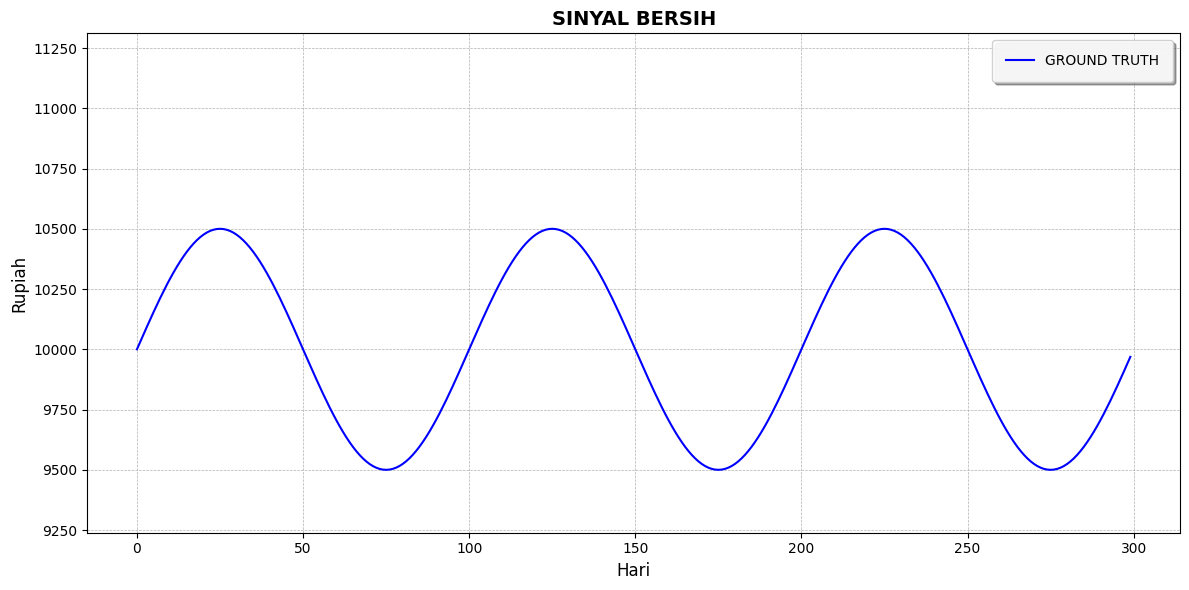

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, correlate
import pandas as pd

fs = 1.0
durasi = 300
t = np.linspace(0, durasi, int(fs * durasi), endpoint=False)

harga_base = 10000

freq_trend = 0.01
sinyal_bersih = 500 * np.sin(2 * np.pi * freq_trend * t)

np.random.seed(42)
noise = np.random.normal(0, 100, t.shape)


harga_pasar = harga_base + sinyal_bersih + noise
total_data = len(harga_pasar)


filter_hari = 20

ground_truth = harga_base + sinyal_bersih

plt.figure(figsize=(12, 6))

plt.plot(t, ground_truth, 'b', label='GROUND TRUTH')

y_max_data = np.nanmax(harga_pasar)
y_min_data = np.nanmin(harga_pasar)
buffer_space = (y_max_data - y_min_data) * 0.40

plt.ylim(y_min_data, y_max_data + buffer_space)


plt.legend(
    loc='upper right',
    frameon=True,
    framealpha=0.9,
    shadow=True,
    borderpad=1
)


plt.title("SINYAL BERSIH", fontsize=14, fontweight='bold')
plt.xlabel("Hari", fontsize=12)
plt.ylabel("Rupiah", fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

# NOISE

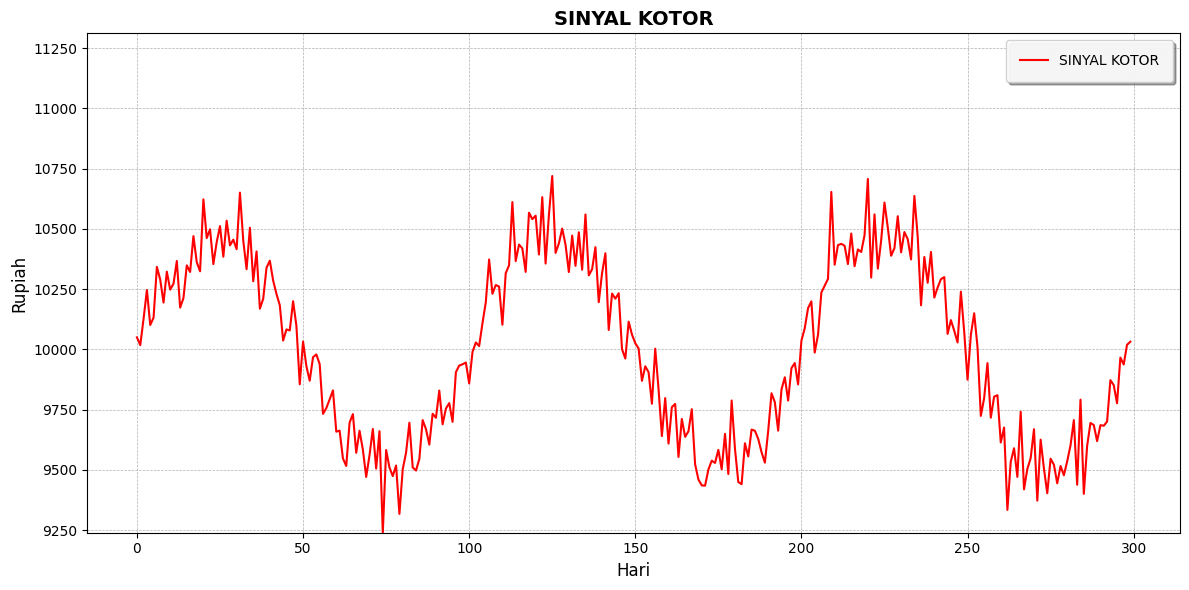

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(t, harga_pasar, 'r', label='SINYAL KOTOR')



y_max_data = np.nanmax(harga_pasar)
y_min_data = np.nanmin(harga_pasar)
buffer_space = (y_max_data - y_min_data) * 0.40

plt.ylim(y_min_data, y_max_data + buffer_space)


plt.legend(
    loc='upper right',
    frameon=True,
    framealpha=0.9,
    shadow=True,
    borderpad=1
)


plt.title("SINYAL KOTOR", fontsize=14, fontweight='bold')
plt.xlabel("Hari", fontsize=12)
plt.ylabel("Rupiah", fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

#MEMBUAT FILTER

======FILTER SMA======
Window SMA: 20


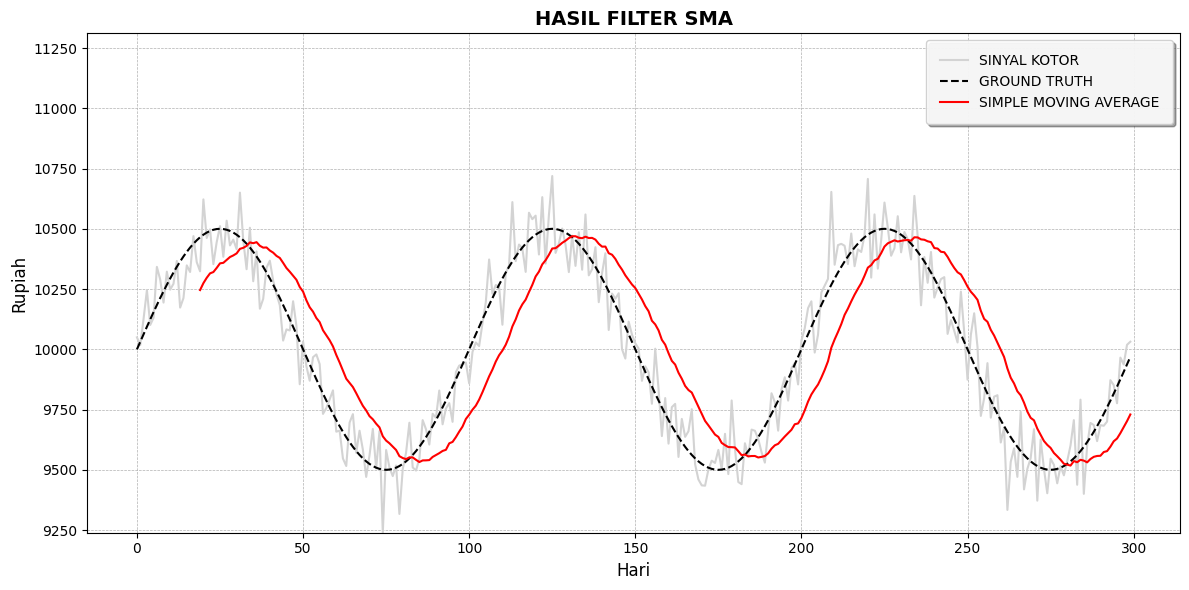

======FILTER EMA======
Window EMA: 20
Alpha EMA: 0.09523809523809523


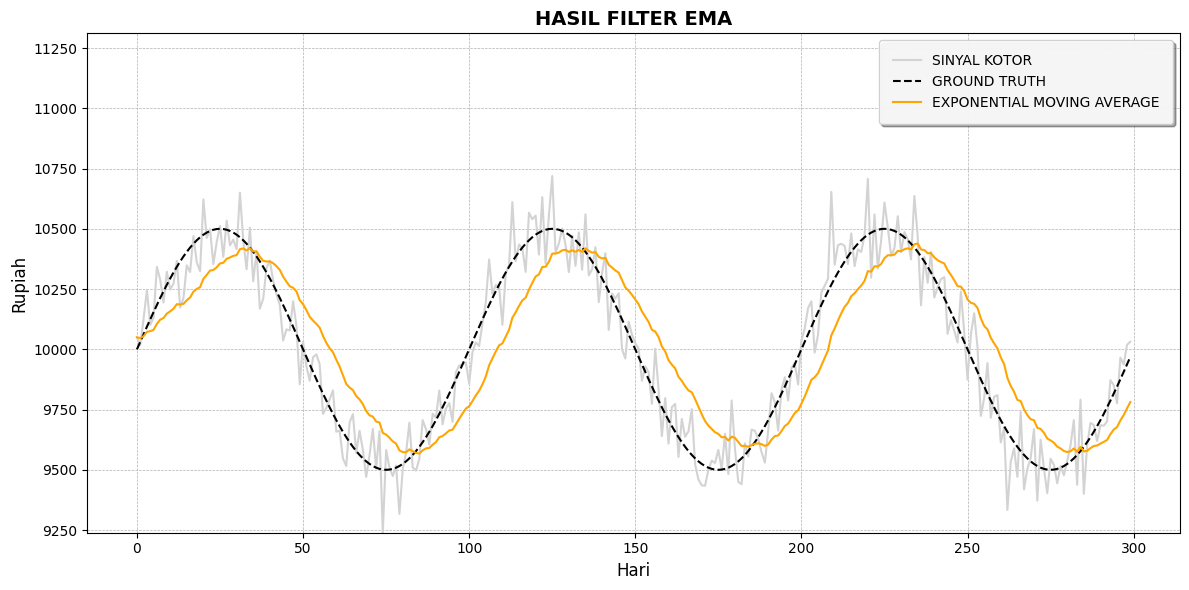

======FILTER IIR BUTTERWORTH Zero-Phase======
Window IIR: 20
Cutoff Frequency: 0.05
Filter Order: 2


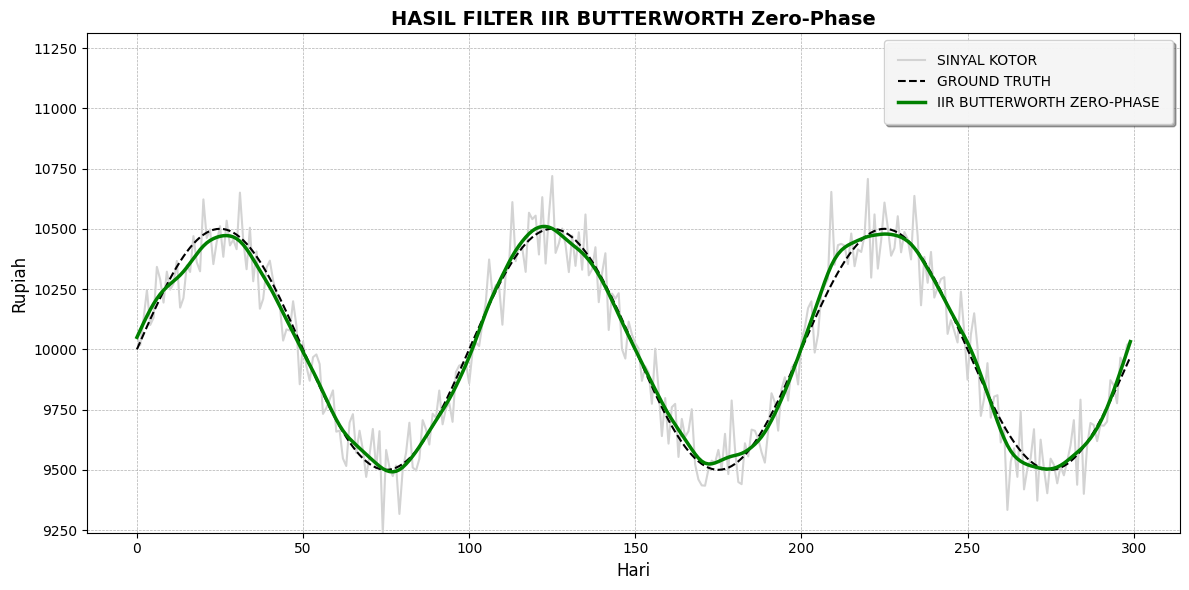

======FILTER CENTERED MOVING AVERAGE (CMA)======
Window CMA: 21
Sisi Kiri & Kanan: 10


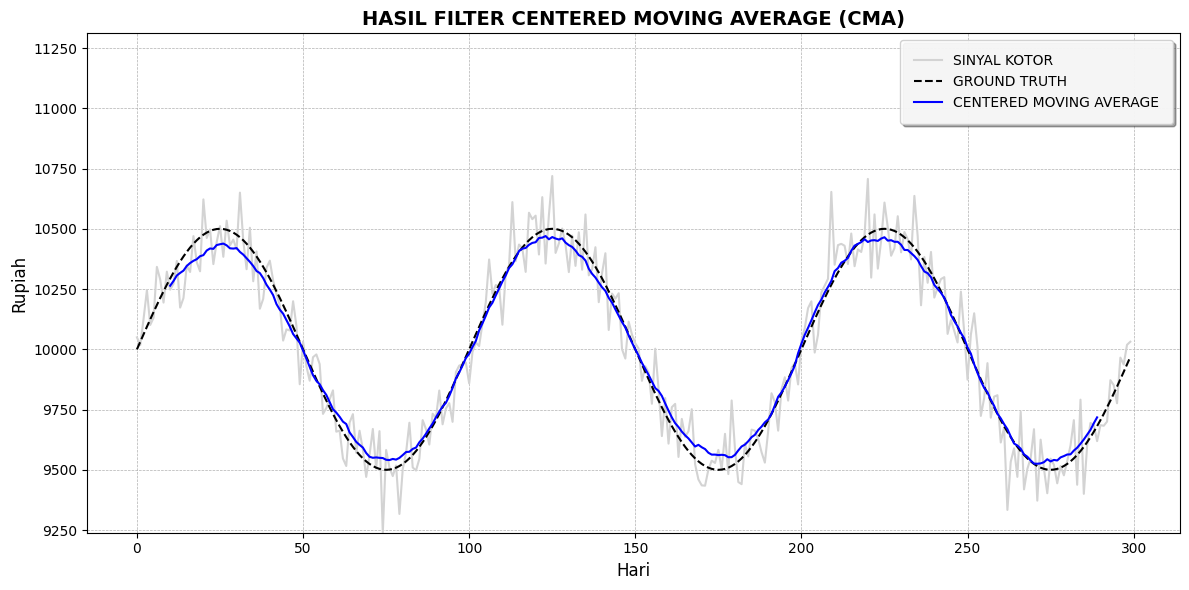

In [ ]:

print('======FILTER SMA======')
hasil_sma = np.full_like(harga_pasar, np.nan)
window_sma = filter_hari
print('Window SMA:', window_sma)


for i in range(window_sma - 1, total_data):
    data_window = harga_pasar[i - window_sma + 1 : i + 1]
    hasil_sma[i] = np.mean(data_window)
plt.figure(figsize=(12, 6))

plt.plot(t, harga_pasar, 'lightgray', label='SINYAL KOTOR')
plt.plot(t, ground_truth, 'k--', label='GROUND TRUTH')
plt.plot(t, hasil_sma, 'r', label='SIMPLE MOVING AVERAGE')



y_max_data = np.nanmax(harga_pasar)
y_min_data = np.nanmin(harga_pasar)
buffer_space = (y_max_data - y_min_data) * 0.40

plt.ylim(y_min_data, y_max_data + buffer_space)


plt.legend(
    loc='upper right',
    frameon=True,
    framealpha=0.9,
    shadow=True,
    borderpad=1
)


plt.title("HASIL FILTER SMA", fontsize=14, fontweight='bold')
plt.xlabel("Hari", fontsize=12)
plt.ylabel("Rupiah", fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()



print('======FILTER EMA======')
hasil_ema = np.zeros_like(harga_pasar)
window_ema = filter_hari
alpha = 2 / (window_ema + 1)

print('Window EMA:', window_ema)
print('Alpha EMA:', alpha)


hasil_ema[0] = harga_pasar[0]

for i in range(1, total_data):
    hasil_ema[i] = (alpha * harga_pasar[i]) + ((1 - alpha) * hasil_ema[i-1])



plt.figure(figsize=(12, 6))

plt.plot(t, harga_pasar, 'lightgray', label='SINYAL KOTOR')
plt.plot(t, ground_truth, 'k--', label='GROUND TRUTH')
plt.plot(t, hasil_ema, 'orange', label='EXPONENTIAL MOVING AVERAGE')



y_max_data = np.nanmax(harga_pasar)
y_min_data = np.nanmin(harga_pasar)
buffer_space = (y_max_data - y_min_data) * 0.40

plt.ylim(y_min_data, y_max_data + buffer_space)


plt.legend(
    loc='upper right',
    frameon=True,
    framealpha=0.9,
    shadow=True,
    borderpad=1
)


plt.title("HASIL FILTER EMA", fontsize=14, fontweight='bold')
plt.xlabel("Hari", fontsize=12)
plt.ylabel("Rupiah", fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()



print('======FILTER IIR BUTTERWORTH Zero-Phase======')
print('Window IIR:', filter_hari)
cutoff_Hz = 1.0 / filter_hari
print('Cutoff Frequency:', cutoff_Hz)
filter_order = 2
print('Filter Order:', filter_order)


b, a = butter(N=filter_order, Wn=cutoff_Hz, btype='lowpass', fs=fs)


hasil_iir_zp = filtfilt(b, a, harga_pasar, padlen=20)



plt.figure(figsize=(12, 6))

plt.plot(t, harga_pasar, 'lightgray', label='SINYAL KOTOR')
plt.plot(t, ground_truth, 'k--', label='GROUND TRUTH')
plt.plot(t, hasil_iir_zp, 'g', linewidth=2.5, label='IIR BUTTERWORTH ZERO-PHASE')



y_max_data = np.nanmax(harga_pasar)
y_min_data = np.nanmin(harga_pasar)
buffer_space = (y_max_data - y_min_data) * 0.40

plt.ylim(y_min_data, y_max_data + buffer_space)


plt.legend(
    loc='upper right',
    frameon=True,
    framealpha=0.9,
    shadow=True,
    borderpad=1
)


plt.title("HASIL FILTER IIR BUTTERWORTH Zero-Phase", fontsize=14, fontweight='bold')
plt.xlabel("Hari", fontsize=12)
plt.ylabel("Rupiah", fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

print('======FILTER CENTERED MOVING AVERAGE (CMA)======')
hasil_cma = np.full_like(harga_pasar, np.nan)
window_cma = filter_hari


if window_cma % 2 == 0:
    window_cma += 1

half_window = window_cma // 2

print('Window CMA:', window_cma)
print('Sisi Kiri & Kanan:', half_window)


for i in range(half_window, total_data - half_window):


    data_window = harga_pasar[i - half_window : i + half_window + 1]
    hasil_cma[i] = np.mean(data_window)


plt.figure(figsize=(12, 6))

plt.plot(t, harga_pasar, 'lightgray', label='SINYAL KOTOR')
plt.plot(t, ground_truth, 'k--', label='GROUND TRUTH')

plt.plot(t, hasil_cma, 'b', label='CENTERED MOVING AVERAGE')


y_max_data = np.nanmax(harga_pasar)
y_min_data = np.nanmin(harga_pasar)
buffer_space = (y_max_data - y_min_data) * 0.40
plt.ylim(y_min_data, y_max_data + buffer_space)

plt.legend(
    loc='upper right',
    frameon=True,
    framealpha=0.9,
    shadow=True,
    borderpad=1
)

plt.title("HASIL FILTER CENTERED MOVING AVERAGE (CMA)", fontsize=14, fontweight='bold')
plt.xlabel("Hari", fontsize=12)
plt.ylabel("Rupiah", fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


#EVALUSASI

In [ ]:
print('====== HASIL EVALUASI GROUND TRUTH ======')
print('Window :', filter_hari)
ground_truth = harga_base + sinyal_bersih

start_valid = filter_hari


valid_target = ground_truth[start_valid:]
valid_sma = hasil_sma[start_valid:]
valid_ema = hasil_ema[start_valid:]
valid_iir = hasil_iir_zp[start_valid:]
valid_cma = hasil_cma[start_valid:]

signal_power = np.var(valid_target)

print('\n====== HASIL EVALUASI RMSE (Single Test) ======')

mse_ma = np.mean((valid_sma - valid_target)**2)
mse_ema = np.mean((valid_ema - valid_target)**2)
mse_iir = np.mean((valid_iir - valid_target)**2)


mse_cma = np.nanmean((valid_cma - valid_target)**2)

print(f'RMSE SMA            : {np.sqrt(mse_ma):.4f}')
print(f'RMSE EMA            : {np.sqrt(mse_ema):.4f}')
print(f'RMSE Zero-Phase     : {np.sqrt(mse_iir):.4f}')
print(f'RMSE CMA            : {np.sqrt(mse_cma):.4f}')


print('\n====== HASIL EVALUASI SNR (Single Test) ======')

snr_sma = 10 * np.log10(signal_power / mse_ma)
snr_ema = 10 * np.log10(signal_power / mse_ema)
snr_iir = 10 * np.log10(signal_power / mse_iir)
snr_cma = 10 * np.log10(signal_power / mse_cma)

print(f'SNR SMA             : {snr_sma:.4f} dB')
print(f'SNR EMA             : {snr_ema:.4f} dB')
print(f'SNR Zero-Phase      : {snr_iir:.4f} dB')
print(f'SNR CMA             : {snr_cma:.4f} dB')

print('\n====== HASIL EVALUASI LAG (Single Test) ======')


norm_target = valid_target - np.mean(valid_target)
norm_sma = valid_sma - np.mean(valid_sma)
norm_ema = valid_ema - np.mean(valid_ema)
norm_iir = valid_iir - np.mean(valid_iir)


mask_cma = ~np.isnan(valid_cma)
cma_clean = valid_cma[mask_cma]
target_clean_for_cma = valid_target[mask_cma]


norm_cma = cma_clean - np.mean(cma_clean)
norm_target_cma = target_clean_for_cma - np.mean(target_clean_for_cma)

def hitung_lag_revised(filter_signal, target_signal):
    corr = correlate(filter_signal, target_signal, mode='full')
    lags = np.arange(-len(filter_signal) + 1, len(filter_signal))
    lag_idx = lags[np.argmax(corr)]
    return lag_idx

lag_sma = hitung_lag_revised(norm_sma, norm_target)
lag_ema = hitung_lag_revised(norm_ema, norm_target)
lag_iir = hitung_lag_revised(norm_iir, norm_target)


lag_cma = hitung_lag_revised(norm_cma, norm_target_cma)

print(f"LAG SMA             : {lag_sma} sampel")
print(f"LAG EMA             : {lag_ema} sampel")
print(f"LAG Zero-Phase      : {lag_iir} sampel")
print(f"LAG CMA             : {lag_cma} sampel")

====== HASIL EVALUASI GROUND TRUTH ======
Window : 20

====== HASIL EVALUASI RMSE (Single Test) ======
RMSE SMA            : 194.2365
RMSE EMA            : 171.0803
RMSE Zero-Phase     : 25.0285
RMSE CMA            : 34.2637

====== HASIL EVALUASI SNR (Single Test) ======
SNR SMA             : 5.2761 dB
SNR EMA             : 6.3787 dB
SNR Zero-Phase      : 23.0740 dB
SNR CMA             : 20.3460 dB

====== HASIL EVALUASI LAG (Single Test) ======
LAG SMA             : 8 sampel
LAG EMA             : 7 sampel
LAG Zero-Phase      : 0 sampel
LAG CMA             : 0 sampel


PERBANDINGAN FILTER


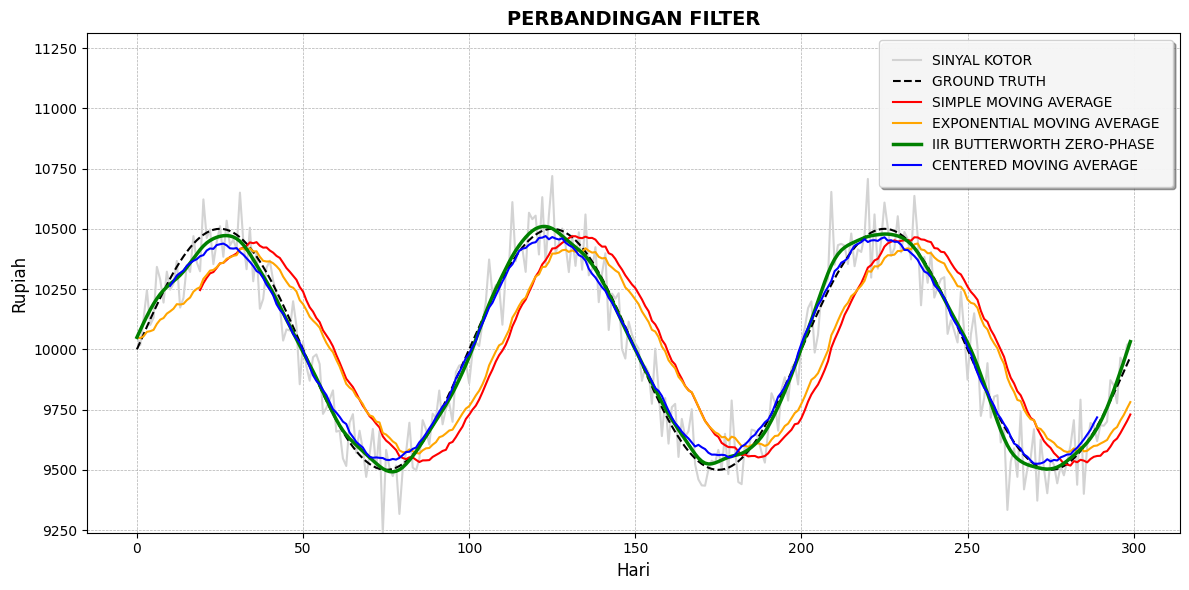

In [ ]:
print('PERBANDINGAN FILTER')


plt.figure(figsize=(12, 6))

plt.plot(t, harga_pasar, 'lightgray', label='SINYAL KOTOR')
plt.plot(t, ground_truth, 'k--', label='GROUND TRUTH')
plt.plot(t, hasil_sma, 'r', label='SIMPLE MOVING AVERAGE')
plt.plot(t, hasil_ema, 'orange', label='EXPONENTIAL MOVING AVERAGE')
plt.plot(t, hasil_iir_zp, 'g', linewidth=2.5, label='IIR BUTTERWORTH ZERO-PHASE')
plt.plot(t, hasil_cma, 'b', label='CENTERED MOVING AVERAGE')



y_max_data = np.nanmax(harga_pasar)
y_min_data = np.nanmin(harga_pasar)
buffer_space = (y_max_data - y_min_data) * 0.40

plt.ylim(y_min_data, y_max_data + buffer_space)


plt.legend(
    loc='upper right',
    frameon=True,
    framealpha=0.9,
    shadow=True,
    borderpad=1
)


plt.title("PERBANDINGAN FILTER", fontsize=14, fontweight='bold')
plt.xlabel("Hari", fontsize=12)
plt.ylabel("Rupiah", fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()




====== HASIL AKHIR ======
   Filter_Length  Lag_SMA  Lag_EMA  Lag_CMA  Lag_IIR   RMSE_SMA   RMSE_EMA  \
0              3        0        0        0        0  54.858195  55.662256   
1              4        0        0        0        0  52.520915  53.027093   
2              5        1        1        0        0  54.723038  55.541325   
3              6        2        1        0        0  60.867380  61.082346   
4              7        2        2        0        0  69.018545  68.291709   

    RMSE_CMA   RMSE_IIR    SNR_SMA    SNR_EMA    SNR_CMA    SNR_IIR  
0  52.394426  71.546803  16.257869  16.131484  16.656998  13.950895  
1  38.535973  60.117357  16.636054  16.552743  19.325373  15.462702  
2  38.535973  52.355607  16.279296  16.150375  19.325373  16.663436  
3  32.687305  46.422654  15.355007  15.324385  20.755117  17.708100  
4  32.687305  42.052021  14.263384  14.355340  20.755117  18.566962  

=== Statistik ===
               count        mean        std        min         25

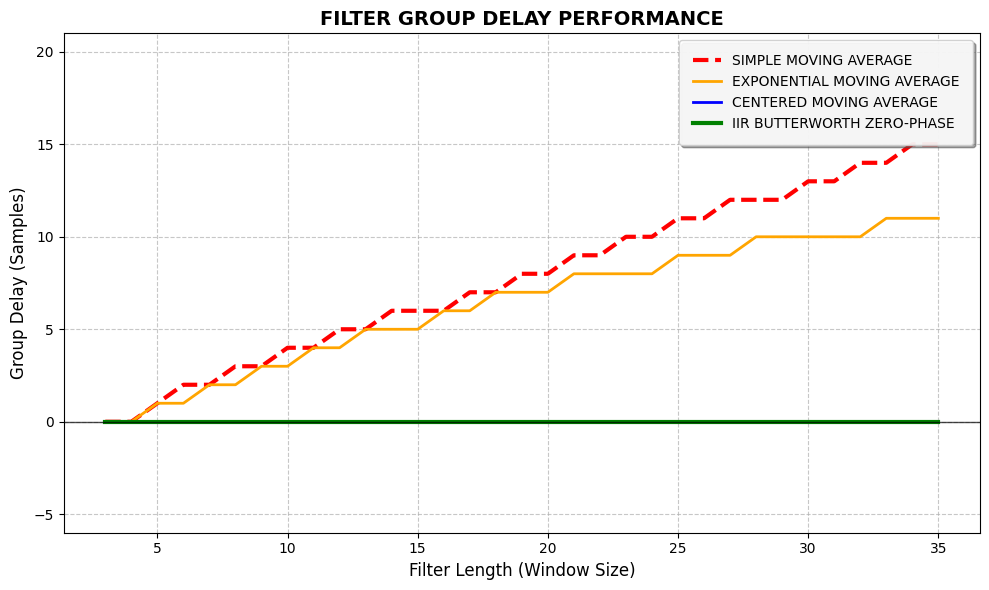

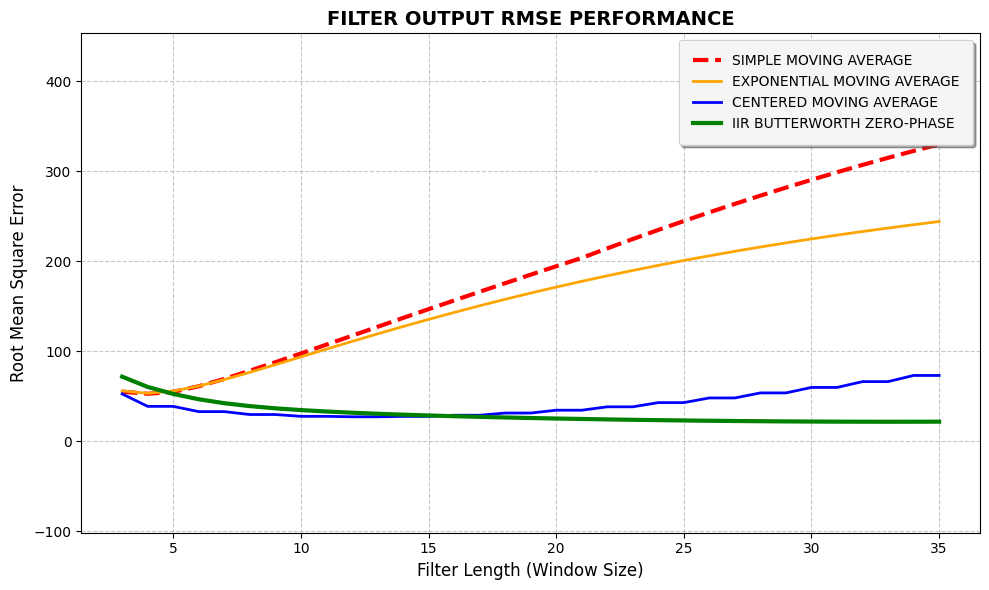

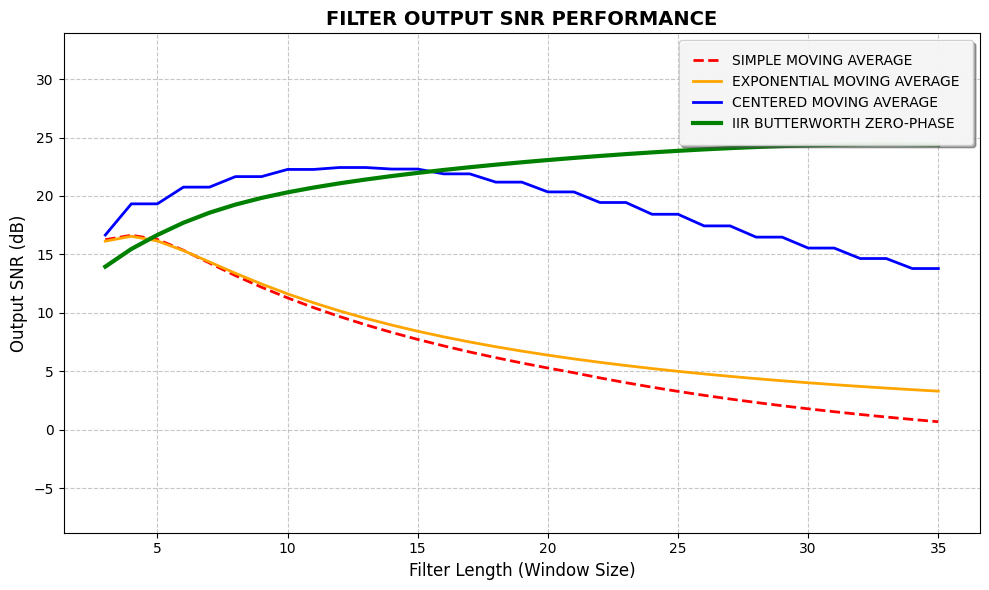

In [ ]:
filter_lengths = range(3, 36)


lags_sma_list = []
lags_ema_list = []
lags_cma_list = []
lags_iir_list = []

snr_sma_list = []
snr_ema_list = []
snr_cma_list = []
snr_iir_list = []

rmse_sma_list = []
rmse_ema_list = []
rmse_cma_list = []
rmse_iir_list = []


for window in filter_lengths:


    sma_result = np.full_like(harga_pasar, np.nan)
    for i in range(window - 1, total_data):
        sma_result[i] = np.mean(harga_pasar[i - window + 1 : i + 1])


    ema_result = np.zeros_like(harga_pasar)
    alpha = 2 / (window + 1)
    ema_result[0] = harga_pasar[0]
    for i in range(1, total_data):
        ema_result[i] = (alpha * harga_pasar[i]) + ((1 - alpha) * ema_result[i-1])


    cma_result = np.full_like(harga_pasar, np.nan)

    cma_window = window if window % 2 != 0 else window + 1
    half_w = cma_window // 2

    for i in range(half_w, total_data - half_w):
        cma_result[i] = np.mean(harga_pasar[i - half_w : i + half_w + 1])


    cutoff_Hz = 1.0 / window
    if cutoff_Hz >= 0.5:
        cutoff_Hz = 0.49
    b, a = butter(N=2, Wn=cutoff_Hz, btype='lowpass', fs=1.0)
    iir_result = filtfilt(b, a, harga_pasar, padlen=20)



    start_idx = filter_hari

    valid_target = ground_truth[start_idx:]
    signal_power = np.var(valid_target)


    valid_sma = sma_result[start_idx:]
    valid_sma = np.nan_to_num(valid_sma, nan=np.nanmean(valid_sma))

    valid_ema = ema_result[start_idx:]
    valid_iir = iir_result[start_idx:]
    valid_cma = cma_result[start_idx:]


    ref_norm = valid_target - np.mean(valid_target)
    sig_sma_norm = valid_sma - np.mean(valid_sma)
    sig_ema_norm = valid_ema - np.mean(valid_ema)
    sig_iir_norm = valid_iir - np.mean(valid_iir)


    def get_lag_val(test, reference):
        corr = correlate(test, reference, mode='full')
        lags = np.arange(-len(test) + 1, len(test))
        return lags[np.argmax(corr)]


    lags_sma_list.append(get_lag_val(sig_sma_norm, ref_norm))
    lags_ema_list.append(get_lag_val(sig_ema_norm, ref_norm))
    lags_iir_list.append(get_lag_val(sig_iir_norm, ref_norm))


    mask_cma = ~np.isnan(valid_cma)
    if np.sum(mask_cma) > 0:
        cma_clean = valid_cma[mask_cma]
        target_clean = valid_target[mask_cma]
        cma_norm = cma_clean - np.mean(cma_clean)
        target_norm_cma = target_clean - np.mean(target_clean)
        lags_cma_list.append(get_lag_val(cma_norm, target_norm_cma))
    else:
        lags_cma_list.append(0)


    mse_sma = np.mean((valid_target - valid_sma)**2)
    mse_ema = np.mean((valid_target - valid_ema)**2)
    mse_iir = np.mean((valid_target - valid_iir)**2)
    mse_cma = np.nanmean((valid_target - valid_cma)**2)

    rmse_sma_list.append(np.sqrt(mse_sma))
    rmse_ema_list.append(np.sqrt(mse_ema))
    rmse_iir_list.append(np.sqrt(mse_iir))
    rmse_cma_list.append(np.sqrt(mse_cma))


    snr_sma_list.append(10 * np.log10(signal_power / mse_sma))
    snr_ema_list.append(10 * np.log10(signal_power / mse_ema))
    snr_iir_list.append(10 * np.log10(signal_power / mse_iir))
    snr_cma_list.append(10 * np.log10(signal_power / mse_cma))



print('\n====== HASIL AKHIR ======')

data_results = {
    'Filter_Length': list(filter_lengths),
    'Lag_SMA': lags_sma_list,
    'Lag_EMA': lags_ema_list,
    'Lag_CMA': lags_cma_list,
    'Lag_IIR': lags_iir_list,
    'RMSE_SMA': rmse_sma_list,
    'RMSE_EMA': rmse_ema_list,
    'RMSE_CMA': rmse_cma_list,
    'RMSE_IIR': rmse_iir_list,
    'SNR_SMA': snr_sma_list,
    'SNR_EMA': snr_ema_list,
    'SNR_CMA': snr_cma_list,
    'SNR_IIR': snr_iir_list
}

df_performance = pd.DataFrame(data_results)

print(df_performance.head())
print("\n=== Statistik ===")
print(df_performance.describe().T)



plt.figure(figsize=(10, 6))

plt.plot(filter_lengths, lags_sma_list, 'r--', linewidth=3, label='SIMPLE MOVING AVERAGE')
plt.plot(filter_lengths, lags_ema_list, 'orange', linewidth=2, label='EXPONENTIAL MOVING AVERAGE')
plt.plot(filter_lengths, lags_cma_list, 'b', linewidth=2, label='CENTERED MOVING AVERAGE')
plt.plot(filter_lengths, lags_iir_list, 'g', linewidth=3, label='IIR BUTTERWORTH ZERO-PHASE')

plt.axhline(0, color='k', linestyle='-', linewidth=1.0, alpha=0.7)

all_lags = lags_sma_list + lags_ema_list + lags_iir_list + lags_cma_list
y_max_lag = np.max(all_lags)
y_min_lag = np.min(all_lags)
buffer_space_lag = (y_max_lag - y_min_lag) * 0.40

plt.ylim(y_min_lag - buffer_space_lag, y_max_lag + buffer_space_lag)

plt.legend(loc='upper right', frameon=True, framealpha=0.9, shadow=True, borderpad=1)
plt.title('FILTER GROUP DELAY PERFORMANCE', fontsize=14, fontweight='bold')
plt.xlabel('Filter Length (Window Size)', fontsize=12)
plt.ylabel('Group Delay (Samples)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



plt.figure(figsize=(10, 6))

plt.plot(filter_lengths, rmse_sma_list, 'r--', linewidth=3, label='SIMPLE MOVING AVERAGE')
plt.plot(filter_lengths, rmse_ema_list, 'orange', linewidth=2, label='EXPONENTIAL MOVING AVERAGE')
plt.plot(filter_lengths, rmse_cma_list, 'b', linewidth=2, label='CENTERED MOVING AVERAGE')
plt.plot(filter_lengths, rmse_iir_list, 'g', linewidth=3, label='IIR BUTTERWORTH ZERO-PHASE')

all_rmse = rmse_sma_list + rmse_ema_list + rmse_iir_list + rmse_cma_list
y_max_rmse = np.max(all_rmse)
y_min_rmse = np.min(all_rmse)
buffer_space_rmse = (y_max_rmse - y_min_rmse) * 0.40

plt.ylim(y_min_rmse - buffer_space_rmse, y_max_rmse + buffer_space_rmse)

plt.legend(loc='upper right', frameon=True, framealpha=0.9, shadow=True, borderpad=1)
plt.title('FILTER OUTPUT RMSE PERFORMANCE', fontsize=14, fontweight='bold')
plt.xlabel('Filter Length (Window Size)', fontsize=12)
plt.ylabel('Root Mean Square Error', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



plt.figure(figsize=(10, 6))

plt.plot(filter_lengths, snr_sma_list, 'r--', linewidth=2, label='SIMPLE MOVING AVERAGE')
plt.plot(filter_lengths, snr_ema_list, 'orange', linewidth=2, label='EXPONENTIAL MOVING AVERAGE')
plt.plot(filter_lengths, snr_cma_list, 'b', linewidth=2, label='CENTERED MOVING AVERAGE')
plt.plot(filter_lengths, snr_iir_list, 'g', linewidth=3, label='IIR BUTTERWORTH ZERO-PHASE')

all_snr = snr_sma_list + snr_ema_list + snr_iir_list + snr_cma_list
y_max_snr = np.max(all_snr)
y_min_snr = np.min(all_snr)
buffer_space_snr = (y_max_snr - y_min_snr) * 0.40

plt.ylim(y_min_snr - buffer_space_snr, y_max_snr + buffer_space_snr)

plt.legend(loc='upper right', frameon=True, framealpha=0.9, shadow=True, borderpad=1)
plt.title('FILTER OUTPUT SNR PERFORMANCE', fontsize=14, fontweight='bold')
plt.xlabel('Filter Length (Window Size)', fontsize=12)
plt.ylabel('Output SNR (dB)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()